In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape
#there are 50000 training images and 1000 test images

(50000, 1)

In [5]:
y_train[:5] # we are getting 2d array 
#y_train is a 2D array, for our classification having 1D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,) # reshaping 2d array into 1d array .
#here -1 represents 10000 from X_test  and blank space represents y_train
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

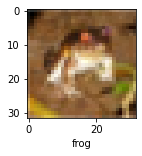

In [10]:
plot_sample(X_train, y_train, 0)

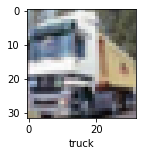

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
#Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) 
#and each value in the channel can range from 0 to 255. 
#Hence to normalize in 0-->1 range, we need to divide it by 255

X_train = X_train / 255.0 #here division of 255 is done to normalize pixel from 0 to 1 range as done in cnn
X_test = X_test / 255.0

In [13]:
#artificial neural network
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 138s 80ms/step - loss: 1.9382 - accuracy: 0.3023
Epoch 2/5
1563/1563 [==============================] - 127s 81ms/step - loss: 1.6486 - accuracy: 0.4160
Epoch 3/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.5593 - accuracy: 0.4455
Epoch 4/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4837 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4352 - accuracy: 0.4981


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.61      0.53      1000
           1       0.72      0.42      0.53      1000
           2       0.47      0.15      0.23      1000
           3       0.33      0.39      0.36      1000
           4       0.43      0.36      0.39      1000
           5       0.60      0.17      0.26      1000
           6       0.34      0.80      0.47      1000
           7       0.67      0.42      0.52      1000
           8       0.52      0.70      0.60      1000
           9       0.51      0.60      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.44     10000
weighted avg       0.51      0.46      0.44     10000



In [15]:
#cnn will figure out different filters by itself , it only requires filter size and how many filters you want
cnn = models.Sequential([
    #convolution layer 
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #dense layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#input_shape show image size
#softmax normalizes from 0 to 1 ie for 0.45 and 0.67 => [0.45/(0.45+0.67)] + [0.67/0.45+0.67]= 1

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 36ms/step - loss: 1.6570 - accuracy: 0.4003
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1097 - accuracy: 0.6120
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9705 - accuracy: 0.6631
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8823 - accuracy: 0.6911
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8164 - accuracy: 0.7160
Epoch 6/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.7501 - accuracy: 0.7408
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6934 - accuracy: 0.7591
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6546 - accuracy: 0.7701
Epoch 9/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6052 - accuracy: 0.7894
Epoch 10/10
1563/1563 [==============================] - 57s 37m

In [18]:
# we can see cnn has better accuracy than ann  
#
#With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN.
#CNN's are best for image classification and gives superb accuracy. 
#Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions 
#while still preserving the features

In [19]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 10ms/step - loss: 0.8985 - accuracy: 0.7049


[0.8984653353691101, 0.7049000263214111]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.9438023e-05, 2.7042103e-07, 3.3598386e-05, 9.3712908e-01,
        1.0022597e-05, 2.5337217e-03, 7.4255595e-04, 2.3625996e-06,
        5.9518654e-02, 1.0275827e-05],
       [5.6155389e-03, 1.8009853e-02, 7.5567241e-06, 5.4372070e-08,
        9.3667518e-09, 1.8038769e-09, 4.9654847e-10, 7.3207562e-10,
        9.7434515e-01, 2.0217984e-03],
       [8.1062920e-02, 8.4585361e-02, 1.3882410e-03, 8.0741994e-04,
        7.1676337e-04, 5.2204530e-04, 1.7276228e-05, 5.2133261e-04,
        8.1996298e-01, 1.0415755e-02],
       [9.2623866e-01, 2.6109817e-03, 1.6842018e-03, 7.6925929e-04,
        6.3470099e-04, 6.1702139e-07, 4.0671503e-04, 6.4630243e-05,
        6.7494698e-02, 9.5616924e-05],
       [1.0917564e-06, 1.8227031e-05, 2.8724940e-02, 2.0831086e-02,
        5.0063884e-01, 3.4337759e-03, 4.4632050e-01, 2.9368959e-05,
        1.9429172e-06, 1.6665159e-07]], dtype=float32)

In [21]:
np.argmax([ 1, 5, 2, 3])

1

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [23]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [24]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

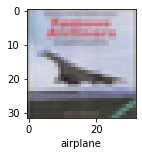

In [25]:
plot_sample(X_test, y_test,3) # truth value

In [26]:
classes[y_classes[3]] # predicted value

'airplane'

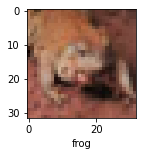

In [27]:
plot_sample(X_test, y_test,5) # truth value

In [28]:
classes[y_classes[5]] #predicted value

'frog'

In [29]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.74      1000
           1       0.86      0.78      0.82      1000
           2       0.63      0.55      0.59      1000
           3       0.49      0.57      0.53      1000
           4       0.63      0.72      0.67      1000
           5       0.70      0.50      0.58      1000
           6       0.76      0.78      0.77      1000
           7       0.76      0.76      0.76      1000
           8       0.77      0.85      0.80      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

